In [1]:
#Gaussian Naive Bayes- using Gaussian instead of other Naive Bayes Classifiers since its more suitable to continuous numbers such as pixels in an image.(Analytics Vidhya, 2025)(Medium,2020)

#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, RocCurveDisplay, classification_report


In [2]:
#loading digits dataset
from sklearn.datasets import load_digits
data_set = load_digits()
df = pd.DataFrame(data_set.data, columns=data_set.feature_names)

#selecting features and target
X = df.loc[:, data_set.feature_names].values
Y = data_set.target

#spliting traing and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=72)

#fit the model
model_gnb = GaussianNB() #(Scikit, 2025)
model_gnb.fit(X_train, Y_train)

GaussianNB()

In [6]:
#model prediction & evaluation
pred_gnb = model_gnb.predict(X_test)
bal_acc_gnb = balanced_accuracy_score(Y_test, pred_gnb) #evaluating balanced accuracy (SCIKIT,2025)
roc_gnb = roc_auc_score(Y_test, model_gnb.predict_proba(X_test), multi_class="ovr", average="macro") #calculating ROC score, using one-vs rest approach to calculate one class against all other classes (SCIKIT,2025)

print("Blanced Accuracy:", bal_acc_gnb)
print("\nROC AUC Score:", roc_gnb)
print("\nClassification Report:\n", classification_report(Y_test, pred_gnb))

Blanced Accuracy: 0.8195914387281524

ROC AUC Score: 0.9801798634402952

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.88      0.66      0.75        32
           2       0.96      0.66      0.78        41
           3       0.95      0.60      0.73        30
           4       0.96      0.84      0.90        32
           5       0.94      0.83      0.88        36
           6       0.90      0.97      0.94        39
           7       0.74      1.00      0.85        31
           8       0.47      0.95      0.63        38
           9       0.97      0.71      0.82        41

    accuracy                           0.82       360
   macro avg       0.88      0.82      0.83       360
weighted avg       0.88      0.82      0.83       360



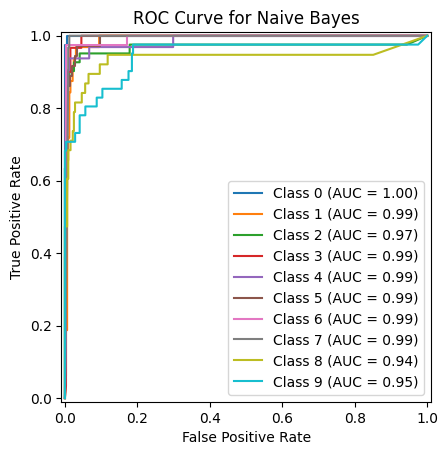

In [5]:
#ROC Curve Display
fig, ax = plt.subplots()
for i in range (10): #10 for 10 classes (0-9)
  RocCurveDisplay.from_predictions(Y_test == i, model_gnb.predict_proba(X_test)[:,i], name=f"Class {i}", ax=ax)

plt.title("ROC Curve for Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()